# Washington Bike Rental Dataset

The dataset consists of bike rentals in washington in the years 2011 and 2012. It includes the count of bike rentals per hour per day and weather information. The data is available on an hourly basis and a daily basis. Here, the hourly data is used. This project includes an EDA on the data and a model to forecast the hourly count of bike rentals.

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

Description of the data:
- instant: record index
- dteday: date
- season: season (1:springer, 2:summer, 3:fall, 4:winter)
- yr: year (0: 2011, 1:2012)
- mnth: month ( 1 to 12)
- hr: hour (0 to 23)
- holiday: weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday: day of the week
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit: 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor

## Loading data and basic information

In [2]:
df = pd.read_csv('data/hour.csv', index_col=0)

The data consists of 16 columns and 17379 data points.

In [3]:
df

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


Check of data types and null-values. There are no null values. Data types are mainly int and float. The 'dteday'-column is a string.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


Temperatures, humidity and wind speed have already be normalized to values between 0 and 1.

In [5]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
# Convert the date and hour to a datetime type
df['datetime'] = pd.to_datetime(df['dteday'] + ' ' + df['hr'].astype(str) + ':00:00')

In [7]:
# Calculate the percentage of casual users from total users
df['casual_percent'] = df['casual']/df['cnt']

In [8]:
df.value_counts('weathersit')

weathersit
1    11413
2     4544
3     1419
4        3
dtype: int64

In [9]:
# Check if calculations and conversions were successfull
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,datetime,casual_percent
instant,,,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,2011-01-01 00:00:00,0.187500
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2011-01-01 01:00:00,0.200000
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,2011-01-01 02:00:00,0.156250
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,2011-01-01 03:00:00,0.230769
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,2011-01-01 04:00:00,0.000000


## Plots

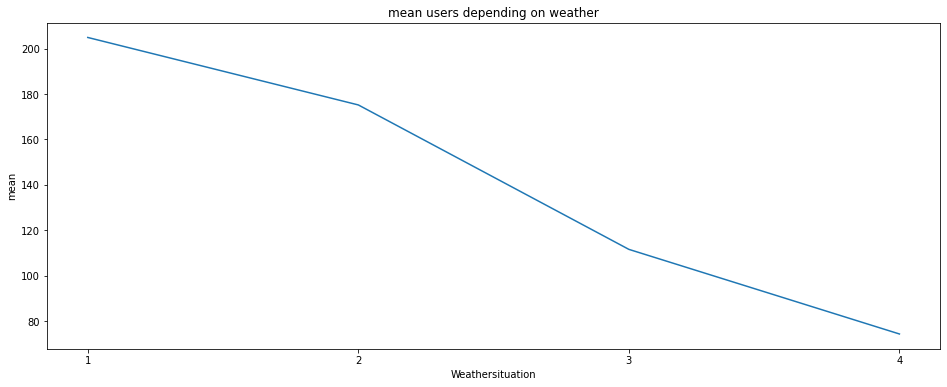

In [10]:
cnt_weathersit = df.groupby('weathersit').mean()['cnt'].reset_index()
plt.figure(figsize=(16, 6))
plt.plot(cnt_weathersit['cnt'])
plt.title('mean users depending on weather')
plt.xlabel('Weathersituation')
plt.ylabel('mean')
plt.xticks(np.arange(len(cnt_weathersit)), cnt_weathersit['weathersit'])  # Set text labels.
plt.show()
# plt.savefig('mean_weather.png',dpi=150)

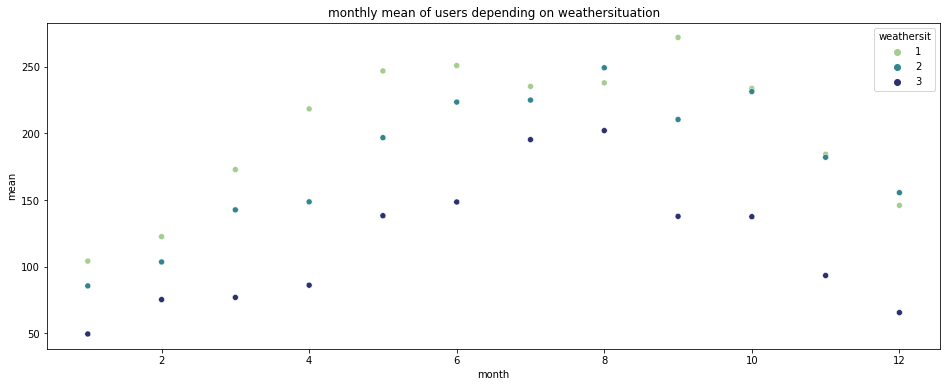

In [11]:
cnt_weathersit_month = df.groupby(['mnth','weathersit']).mean()['cnt'].reset_index()
cnt_weathersit_month = cnt_weathersit_month[cnt_weathersit_month['weathersit'] < 4]
plt.figure(figsize=(16, 6))
sns.scatterplot(x='mnth', y='cnt', data=cnt_weathersit_month, hue='weathersit', palette="crest")
plt.title('monthly mean of users depending on weathersituation')
plt.xlabel('month')
plt.ylabel('mean')
plt.show()
# plt.savefig('monthly_weather.png',dpi=150)

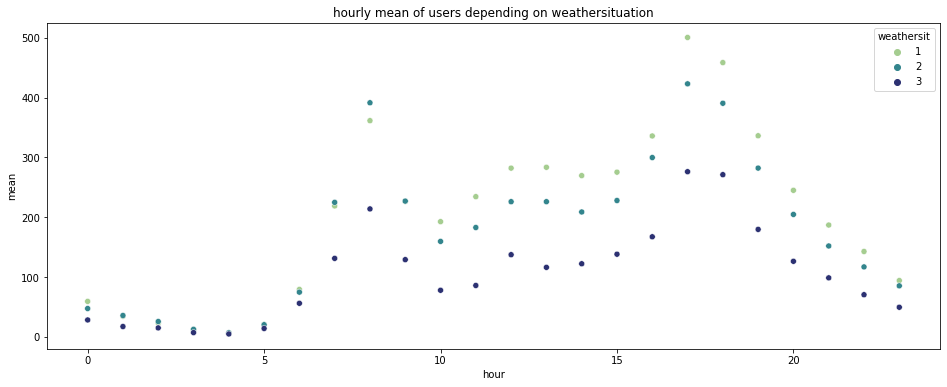

In [12]:
cnt_weathersit_hour = df.groupby(['hr','weathersit']).mean()['cnt'].reset_index()
cnt_weathersit_hour = cnt_weathersit_hour[cnt_weathersit_hour['weathersit'] < 4]
plt.figure(figsize=(16, 6))
sns.scatterplot(x='hr', y='cnt', data=cnt_weathersit_hour, hue='weathersit', palette="crest")
plt.title('hourly mean of users depending on weathersituation')
plt.xlabel('hour')
plt.ylabel('mean')
plt.show()
# plt.savefig('hourly_weather.png',dpi=150)

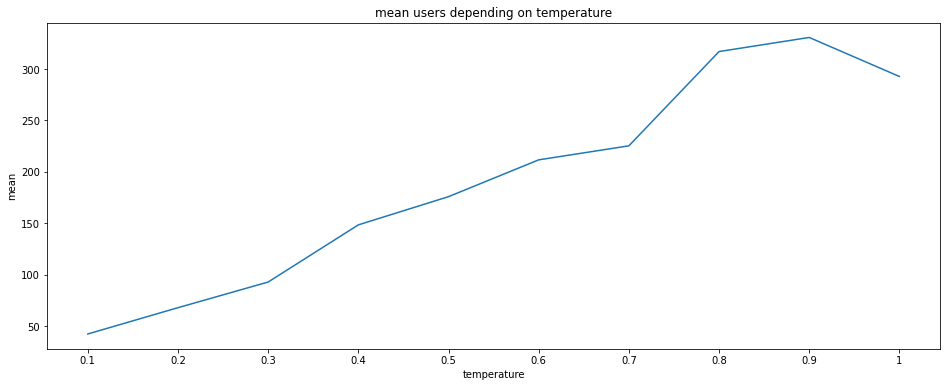

In [13]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
temp_bin = df.groupby(pd.cut(df['temp'], bins=bins)).mean()['cnt'].reset_index()
plt.figure(figsize=(16, 6))
plt.plot(temp_bin['cnt'])
plt.title('mean users depending on temperature')
plt.xlabel('temperature')
plt.ylabel('mean')
plt.xticks(np.arange(len(temp_bin)), bins[1:])  # Set text labels.
plt.show()
# plt.savefig('mean_temp.png',dpi=150)

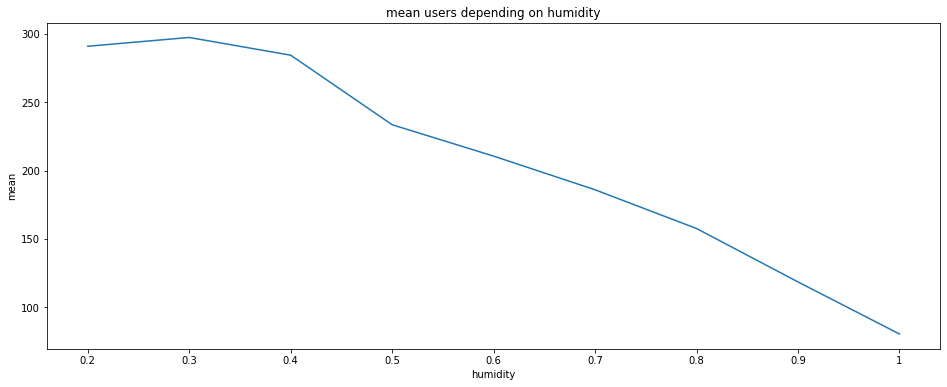

In [14]:
bins = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
hum_bin = df.groupby(pd.cut(df['hum'], bins=bins)).mean()['cnt'].reset_index()
plt.figure(figsize=(16, 6))
plt.plot(hum_bin['cnt'])
plt.title('mean users depending on humidity')
plt.xlabel('humidity')
plt.ylabel('mean')
plt.xticks(np.arange(len(hum_bin)), bins[1:])  # Set text labels.
plt.show()
# plt.savefig('mean_humidity.png',dpi=150)

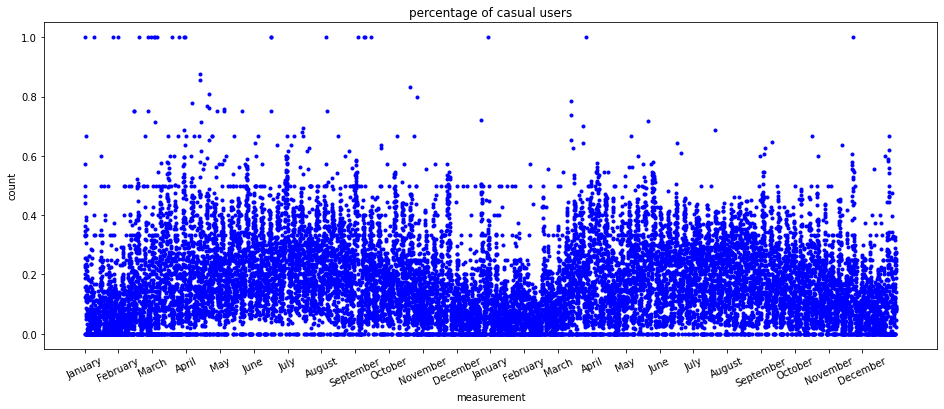

In [15]:
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
length = len(df)
plt.figure(figsize=(16, 6))
plt.plot(df['casual_percent'], 'b.')
plt.title('percentage of casual users')
plt.xlabel('measurement')
plt.ylabel('count')
plt.xticks(np.arange(0, length, step=length/24), month*2, rotation=25)  # Set text labels.
plt.show()
# plt.savefig('percentage_casual.png',dpi=150)

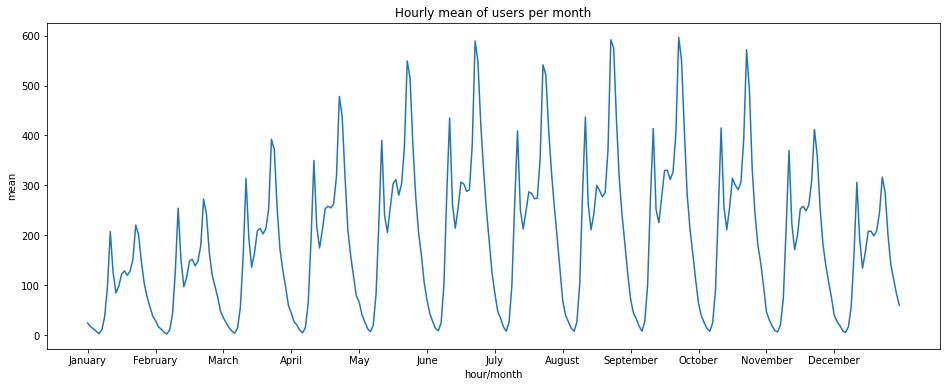

In [16]:
cnt_mnth_hr = df.groupby(['mnth','hr']).mean()['cnt'].reset_index()
length_mth = len(cnt_mnth_hr)
plt.figure(figsize=(16, 6))
plt.plot(cnt_mnth_hr['cnt'])
plt.title('Hourly mean of users per month')
plt.xlabel('hour/month')
plt.ylabel('mean')
plt.xticks(np.arange(0, length_mth, step=length_mth/12), month)  # Set text labels.
plt.show()
# plt.savefig('hourly_mean_month.png',dpi=150)

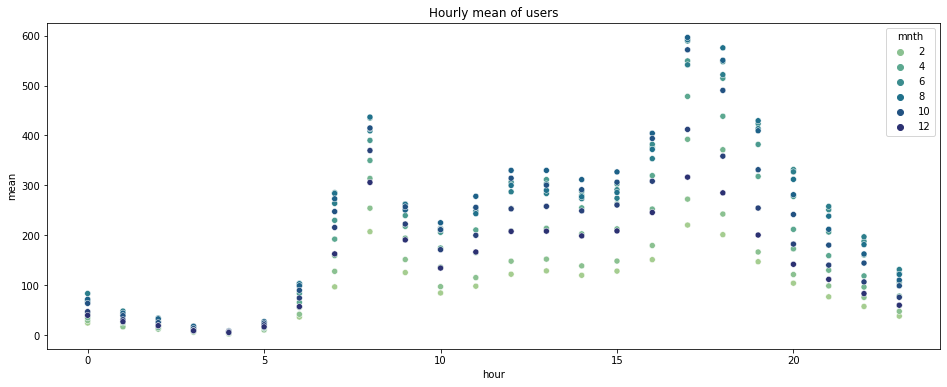

In [17]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='hr', y='cnt', data=cnt_mnth_hr, hue='mnth', palette="crest")
plt.title('Hourly mean of users')
plt.xlabel('hour')
plt.ylabel('mean')
plt.show()
# plt.savefig('hourly_mean.png',dpi=150)

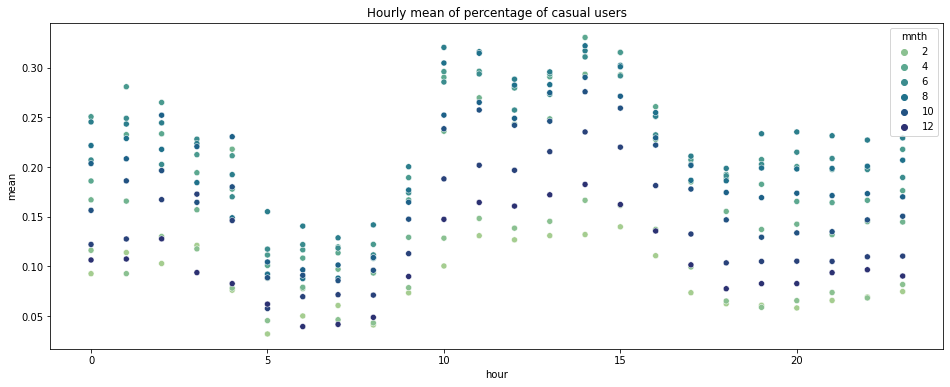

In [18]:
casual_mnth_hr = df.groupby(['mnth','hr']).mean()['casual_percent'].reset_index()
# cnt_mnth_hr
plt.figure(figsize=(16, 6))
sns.scatterplot(x='hr', y='casual_percent', data=casual_mnth_hr, hue='mnth', palette="crest")
plt.title('Hourly mean of percentage of casual users')
plt.xlabel('hour')
plt.ylabel('mean')
plt.show()
# plt.savefig('percentage_casual_hourly_mean.png',dpi=150)

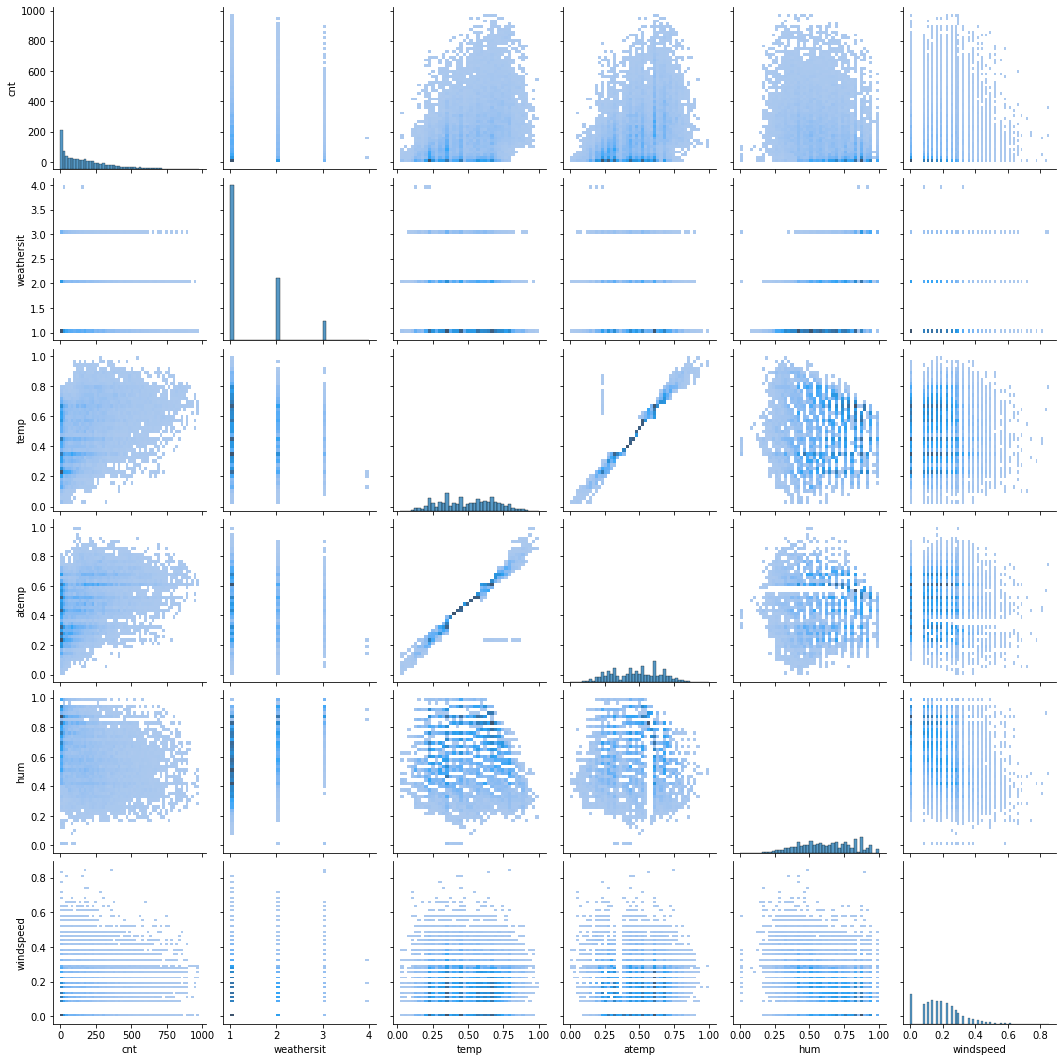

In [19]:
sns.pairplot(df, x_vars=['cnt','weathersit','temp','atemp','hum','windspeed'],
             y_vars=['cnt','weathersit','temp','atemp','hum','windspeed'], kind='hist')

<AxesSubplot:>

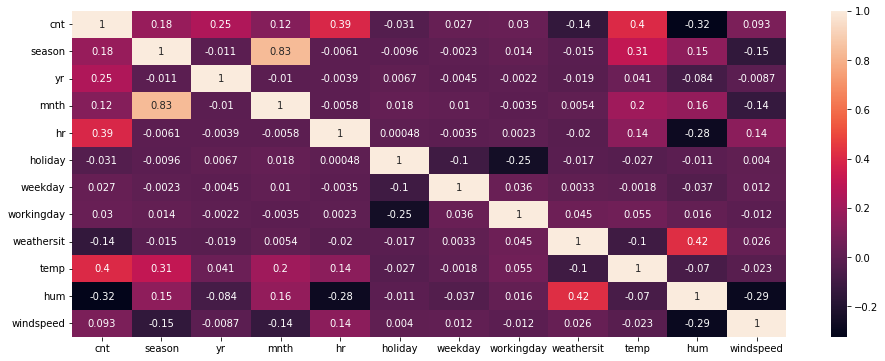

In [20]:
plt.figure(figsize=(16, 6))
sns.heatmap(df[['cnt','season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed']].corr(),
           annot=True)


## Random Forest Model

In [21]:
X = df[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed']]
y = df.cnt
split = round(len(X)*0.75)
X_train = X[:split]
X_test = X[split:]
y_train = y[:split]
y_test = y[split:]

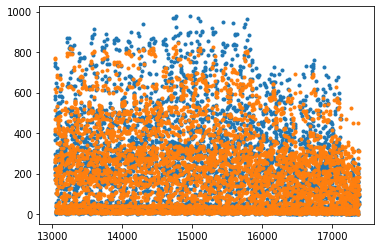

In [22]:
# fit the model
my_rf = RandomForestRegressor()
my_rf.fit(X_train, y_train)
 
# predict on the same period
y_preds = my_rf.predict(X_test)
 
# plot what has been learned
plt.plot(X_test.index, y_test, '.')
plt.plot(X_test.index, y_preds, '.')

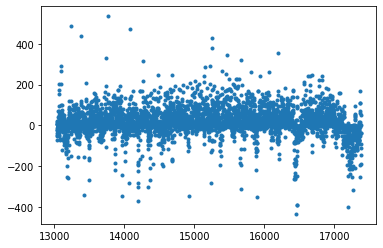

In [23]:
y_res = y_test - y_preds
plt.plot(X_test.index, y_res, '.')

In [24]:
print('Mean: ' + str(round(y_res.mean(),2)))
print('Median: ' + str(round(y_res.median(),2)))
print('RSME: ' + str(round(((y_res) ** 2).mean() ** .5,2)))

Mean: 17.83
Median: 10.1
RSME: 71.08
